In [1]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

import time
import random

from gymnasium import spaces
import molcontrol

## Parameters
steps = 100000
target = 20
molecule_lifetime = 1.0
dt = 0.5
history_length = 1
observable_indices = np.array([0])

##Seed
forget_param = 1/1000.0

def lookup_table(steps, target, molecule_lifetime, dt, history_length, observable_indices, upper_mol, forget_param, RUN_SEED):
    average_death = target * dt/molecule_lifetime
    action_array, counter_array = molcontrol.table_init(len(observable_indices), upper_mol, average_death)
    rewards_overtime = molcontrol.tabular_molecule_controller(action_array, counter_array, forget_param, steps, target, molecule_lifetime, dt, history_length, observable_indices, RUN_SEED)
    return rewards_overtime, action_array, counter_array

##We run both of these functions for a large number of seeds and display the averaged results
RUN_SEEDS = np.arange(0, 10)

dt_vals = np.array([0.05, 0.1, 0.2, 0.5, 1.0, 2.0, 5.0])
for dt in dt_vals:
    table_rewards = []
    action_arrays = []
    opt_reward = []
    upper_mol = target*3 + 10
    for SEED in RUN_SEEDS:
        rewards_overtime, action_array, counter_array = lookup_table(steps, target, molecule_lifetime, dt, history_length, observable_indices, upper_mol, forget_param, SEED)
        table_rewards.append(rewards_overtime)
        action_arrays.append(action_array)
    
        rewards_overtime_opt = molcontrol.optimal_solution(steps, target, molecule_lifetime, dt, SEED)
        opt_reward.append(rewards_overtime_opt)
    
    reward_array = np.stack(table_rewards)
    reward_opt_array = np.stack(opt_reward)
    action_arrs = np.stack(action_arrays)
    
    np.savetxt("reward_array"+str(dt)+".txt", reward_array)
    np.savetxt("reward_opt_array"+str(dt)+".txt", reward_opt_array)
    np.savetxt("action_arrs"+str(dt)+".txt", action_arrs)
    
    print ("Done for all the seeds for dt ", dt)




Done for all the seeds for dt  0.05
Done for all the seeds for dt  0.1
Done for all the seeds for dt  0.2
Done for all the seeds for dt  0.5
Done for all the seeds for dt  1.0
Done for all the seeds for dt  2.0
Done for all the seeds for dt  5.0


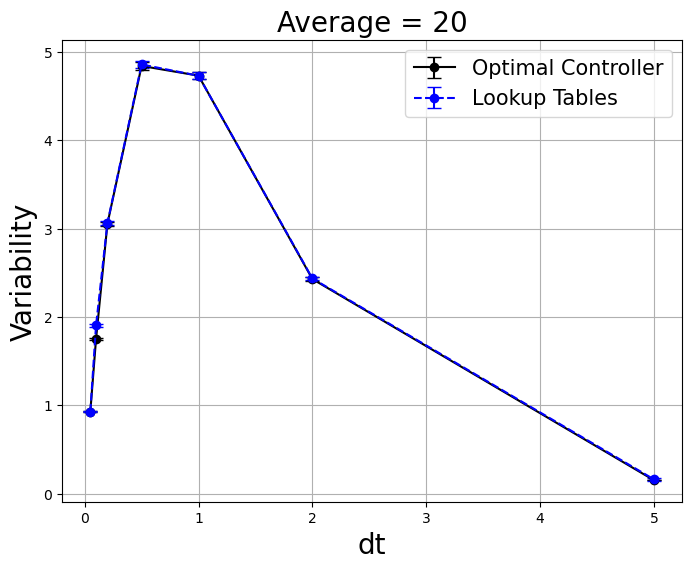

In [2]:
import numpy as np
import matplotlib.pyplot as plt

dt_vals = np.array([0.05, 0.1, 0.2, 0.5, 1.0, 2.0, 5.0])
reward_means_tgt = []
reward_stds_tgt = []

reward_means_tgt_opt = []
reward_stds_tgt_opt = []

for dt in dt_vals:
    filename = "reward_array" + str(dt) + ".txt"
    reward_array = np.loadtxt(filename)

    filename = "reward_opt_array" + str(dt) + ".txt"
    reward_opt_array = np.loadtxt(filename)

    filename = "action_arrs" + str(dt) + ".txt"
    action_arrs = np.loadtxt(filename)

    # Compute the average of the last X elements for each array, and the overall mean and standard deviation of these averages
    # Since we want variability, which is the negative reward, we'll insert a negative sign
    reward_array_averages = np.mean(-reward_array[:, -50000:], axis=1)
    overall_mean_reward = np.mean(reward_array_averages)
    overall_std_reward = np.std(reward_array_averages)

    #print (reward_array_averages)
    #print (overall_mean_reward, ' with var ', overall_std_reward)

    reward_array_averages_opt = np.mean(-reward_opt_array[:, -50000:], axis=1)
    overall_mean_reward_opt = np.mean(reward_array_averages_opt)
    overall_std_reward_opt = np.std(reward_array_averages_opt)

    reward_means_tgt.append(overall_mean_reward)
    reward_stds_tgt.append(overall_std_reward)
    
    reward_means_tgt_opt.append(overall_mean_reward_opt)
    reward_stds_tgt_opt.append(overall_std_reward_opt)

    ##now we obtain the average reward trace across the 10 seeds
    #rewards_overtime_average = np.mean(reward_array, axis=0)
    #rewards_overtime_opt_average = np.mean(reward_opt_array, axis=0)

    ##compute the value
    #rewards_overtime_average_val = np.mean(rewards_overtime_average[50000:,])
    #rewards_overtime_opt_average_val = np.mean(rewards_overtime_opt_average[50000:,])

    ##optional printing to check results
    #print ("The table's average overall is ", np.mean(rewards_overtime_average))
    #print ("The optimal controllers average overall is ", np.mean(rewards_overtime_opt_average))
    #print ("The table's average is ", rewards_overtime_average_val)
    #print ("The optimal controllers average is ", rewards_overtime_opt_average_val, ' \n')

np.savetxt("reward_means_an_dt.txt", reward_means_tgt)
np.savetxt("reward_std_an_dt.txt", reward_stds_tgt)

# Plotting the means with error bars
plt.figure(figsize=(8, 6))
plt.errorbar(dt_vals, reward_means_tgt_opt, yerr=reward_stds_tgt_opt, fmt='o-',color='k', capsize=5, label='Optimal Controller')
plt.errorbar(dt_vals, reward_means_tgt, yerr=reward_stds_tgt, fmt='o--',color='b', capsize=5, label='Lookup Tables')

# Adding labels and title
plt.xlabel('dt', fontsize = 20)
plt.ylabel('Variability', fontsize = 20)
plt.legend(loc='best', fontsize = 15)
plt.title("Average = 20", fontsize = 20)

# Show plot
plt.grid(True)
plt.savefig("avg20_comparison_analytic_model.png")
plt.show()



In [4]:
dt_vals = np.array([0.05, 0.1, 0.2, 0.5, 1.0, 2.0, 5.0])
for dt in dt_vals:
    prob_survival =np.exp(-dt/molecule_lifetime)
    print ("For ", dt, ' the probability of survival is ', prob_survival)
    
    optimal_action = target - target*(prob_survival)
    print ("The optimal action is ", optimal_action)

For  0.05  the probability of survival is  0.951229424500714
The optimal action is  0.9754115099857188
For  0.1  the probability of survival is  0.9048374180359595
The optimal action is  1.9032516392808105
For  0.2  the probability of survival is  0.8187307530779818
The optimal action is  3.6253849384403622
For  0.5  the probability of survival is  0.6065306597126334
The optimal action is  7.869386805747332
For  1.0  the probability of survival is  0.36787944117144233
The optimal action is  12.642411176571153
For  2.0  the probability of survival is  0.1353352832366127
The optimal action is  17.293294335267746
For  5.0  the probability of survival is  0.006737946999085467
The optimal action is  19.865241060018292
